In [ ]:
### CHANGE TO THE FILEPATH OF THE NLP PROJECT FOLDER
NLP_folder = '/content/drive/MyDrive/NLP Project'

n_datapoints = 1000000
n_epochs = 2
possible_orders = ['original', 'reversed', 'random', 'ordered_svo', 'ordered_sov', 'ordered_vos', 'ordered_vso', 'ordered_osv', 'ordered_ovs', 'initial', 'final']

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install datasets
from datasets import load_dataset, Dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import sys
sys.path.append(NLP_folder)
import data_processing_utils

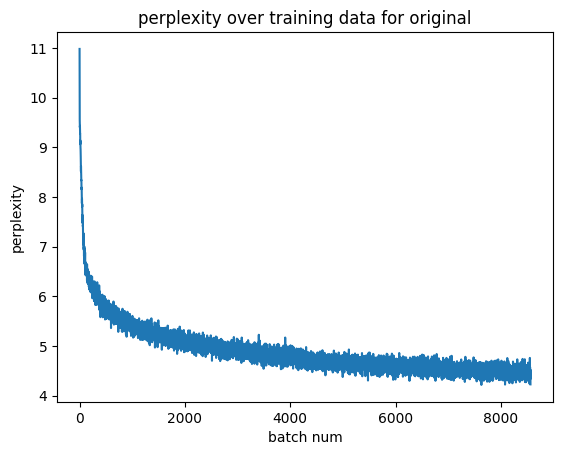

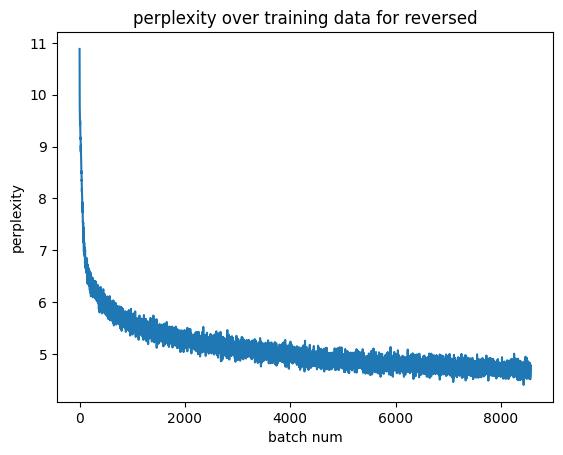

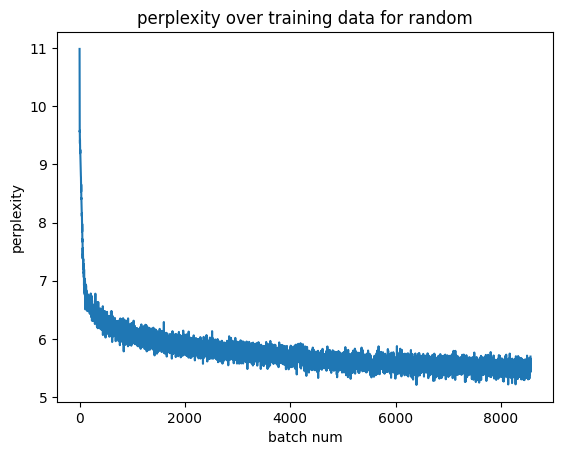

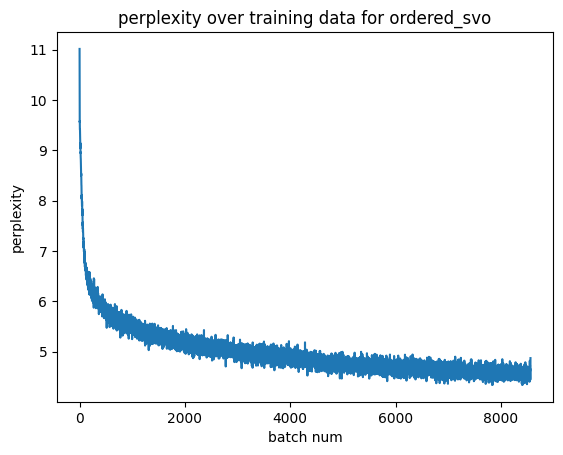

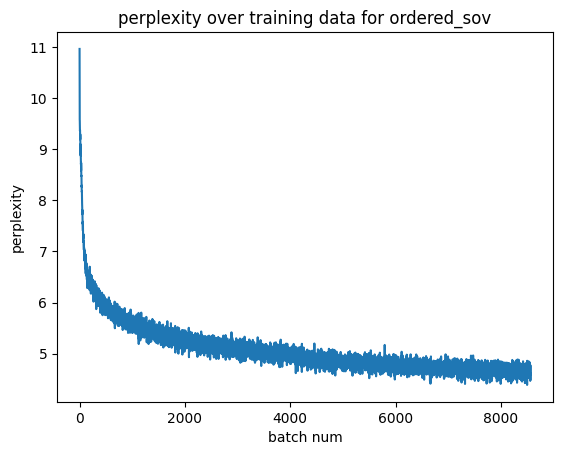

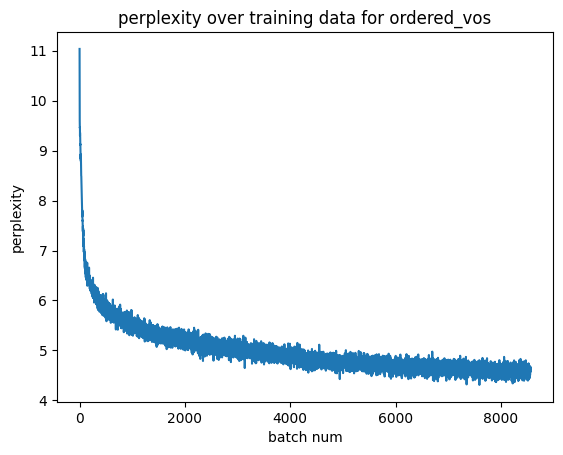

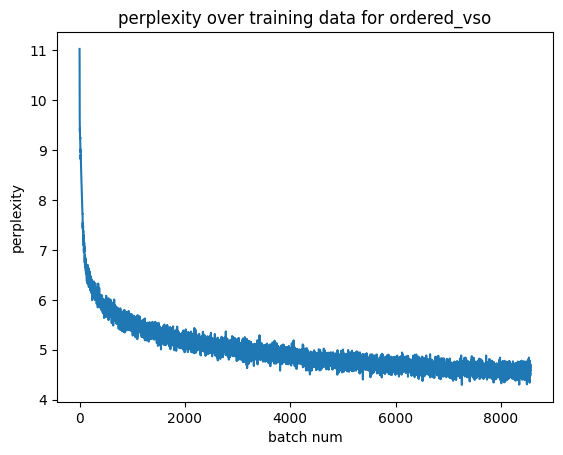

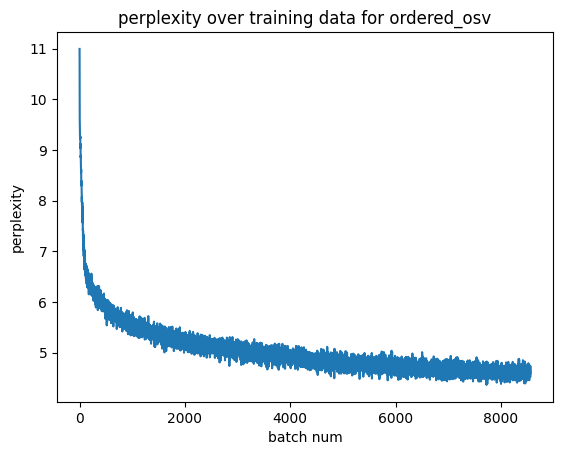

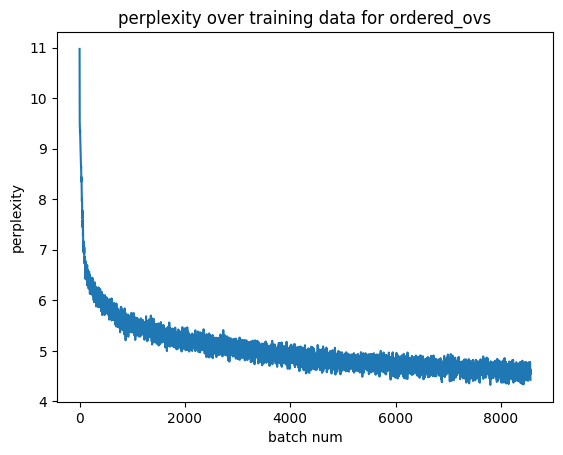

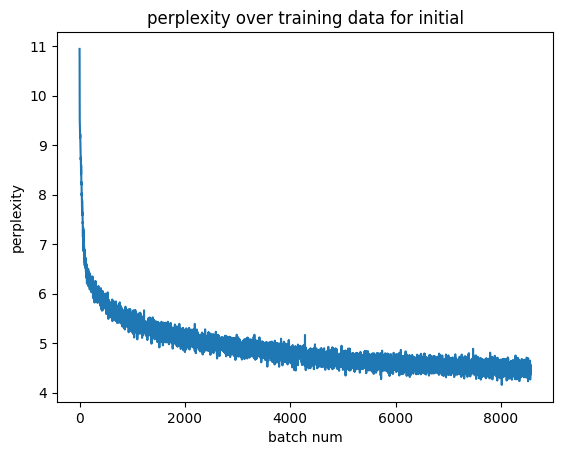

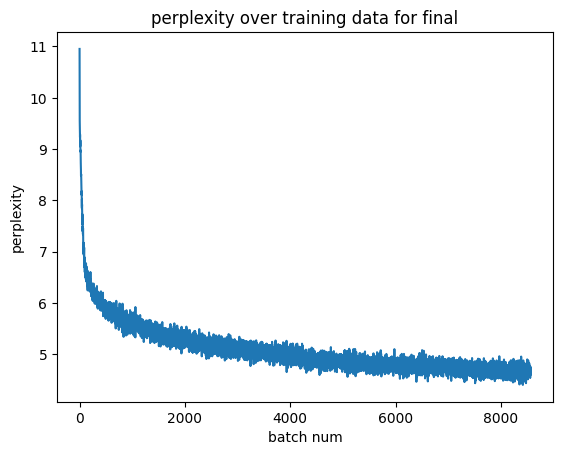

In [37]:
# plot perplexity over num batches for training of each order
dataset_names = ["training", "test", "validation"]
dataset_name = "training"
for order in possible_orders:
    file_name = f'{NLP_folder}/trained_model_{order}_{n_datapoints}_{n_epochs}/{dataset_name}_losses'
    loss_data = data_processing_utils.load_from_json_file(file_name)
    pd.Series(loss_data).plot(title=f'perplexity over {dataset_name} data for {order}', xlabel='batch num', ylabel='perplexity')
    plt.show()


In [ ]:
def get_rolling_mean(loss_data):
    rolling_mean_loss_data = []
    count = 0
    total = 0
    for loss in loss_data:
        total += loss
        count += 1
        rolling_mean_loss_data.append(total/count)
    return rolling_mean_loss_data

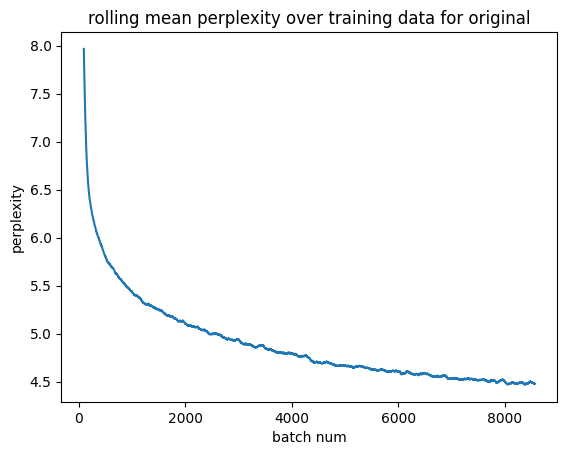

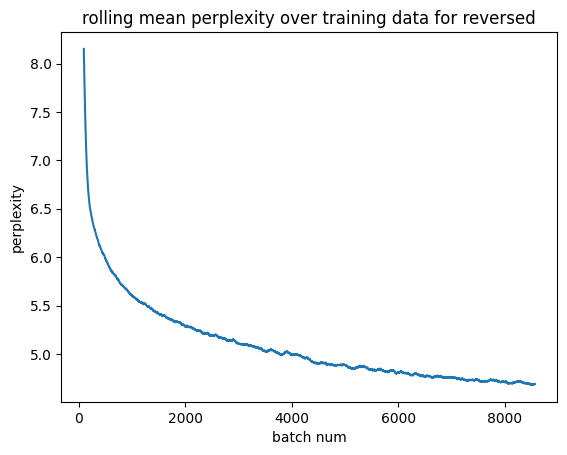

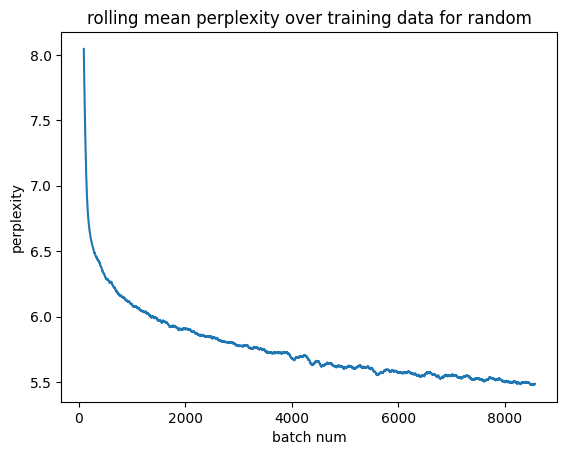

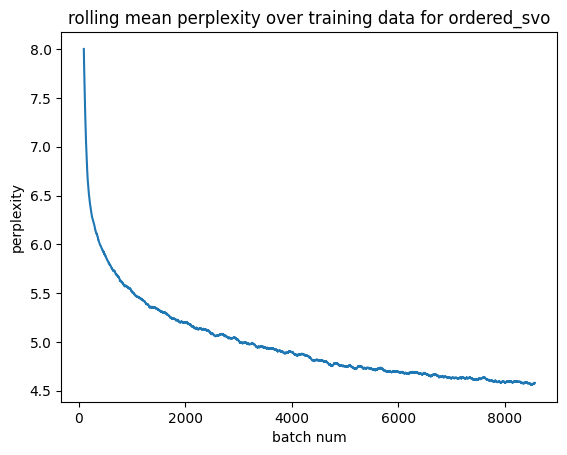

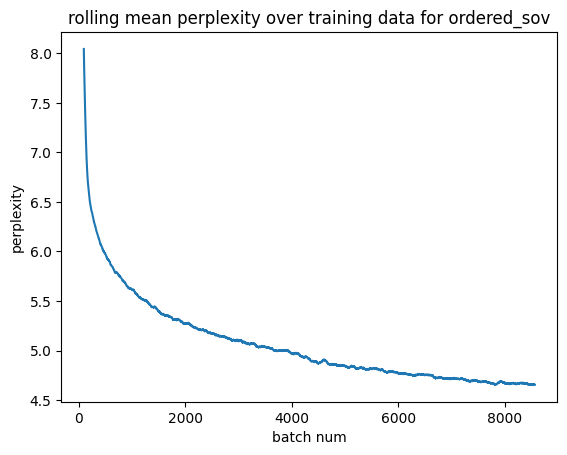

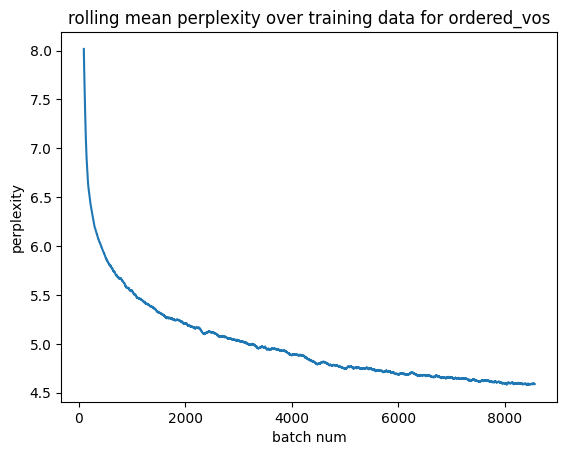

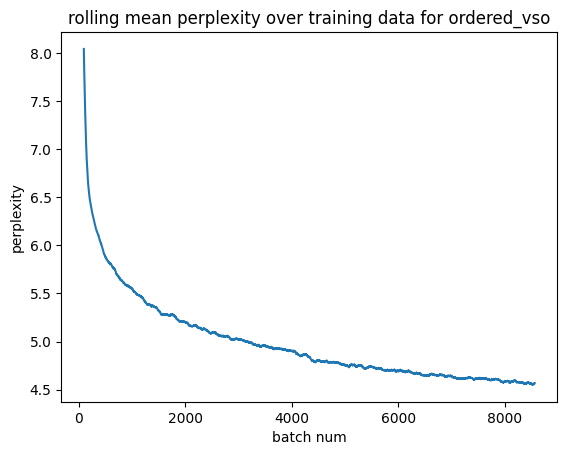

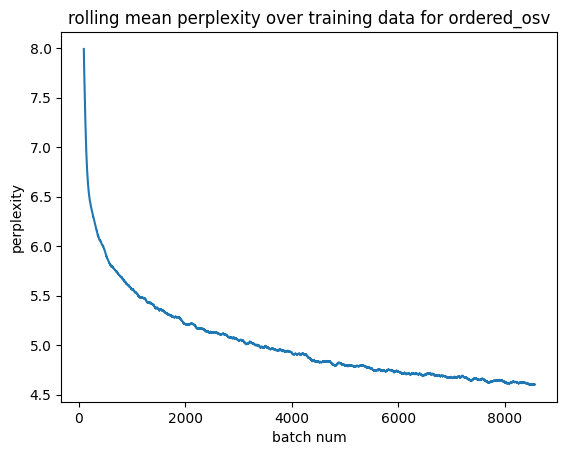

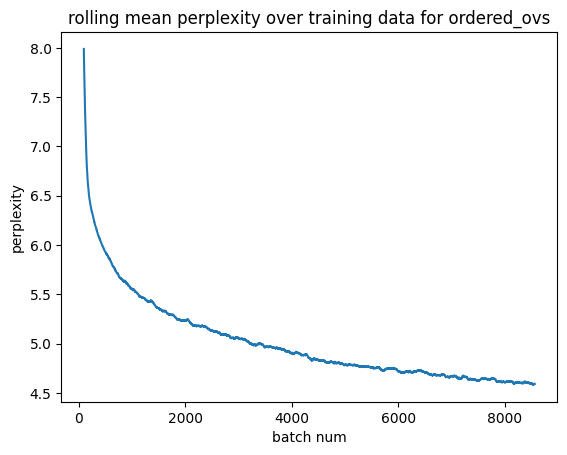

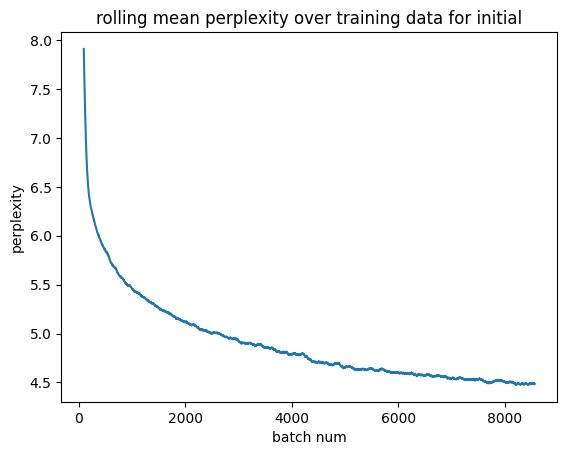

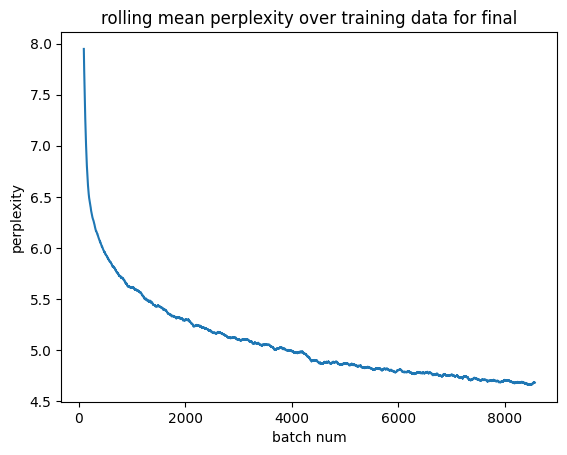

In [ ]:
#plot rolling mean of perplexity

dataset_names = ["training", "test", "validation"]
dataset_name = "training"
for order in possible_orders:
    file_name = f'{NLP_folder}/trained_model_{order}_{n_datapoints}_{n_epochs}/{dataset_name}_losses'
    loss_data = data_processing_utils.load_from_json_file(file_name)
    pd.Series(loss_data).rolling(100).mean().plot(title=f'rolling mean perplexity over {dataset_name} data for {order}', xlabel='batch num', ylabel='perplexity')
    plt.show()

In [ ]:
colors = ['k', 'tab:orange', 'y', '#bb5050', '#8b0000', '#5050bb', '#00008b', '#50bb50', '#008b00', 'tab:pink', 'tab:purple']

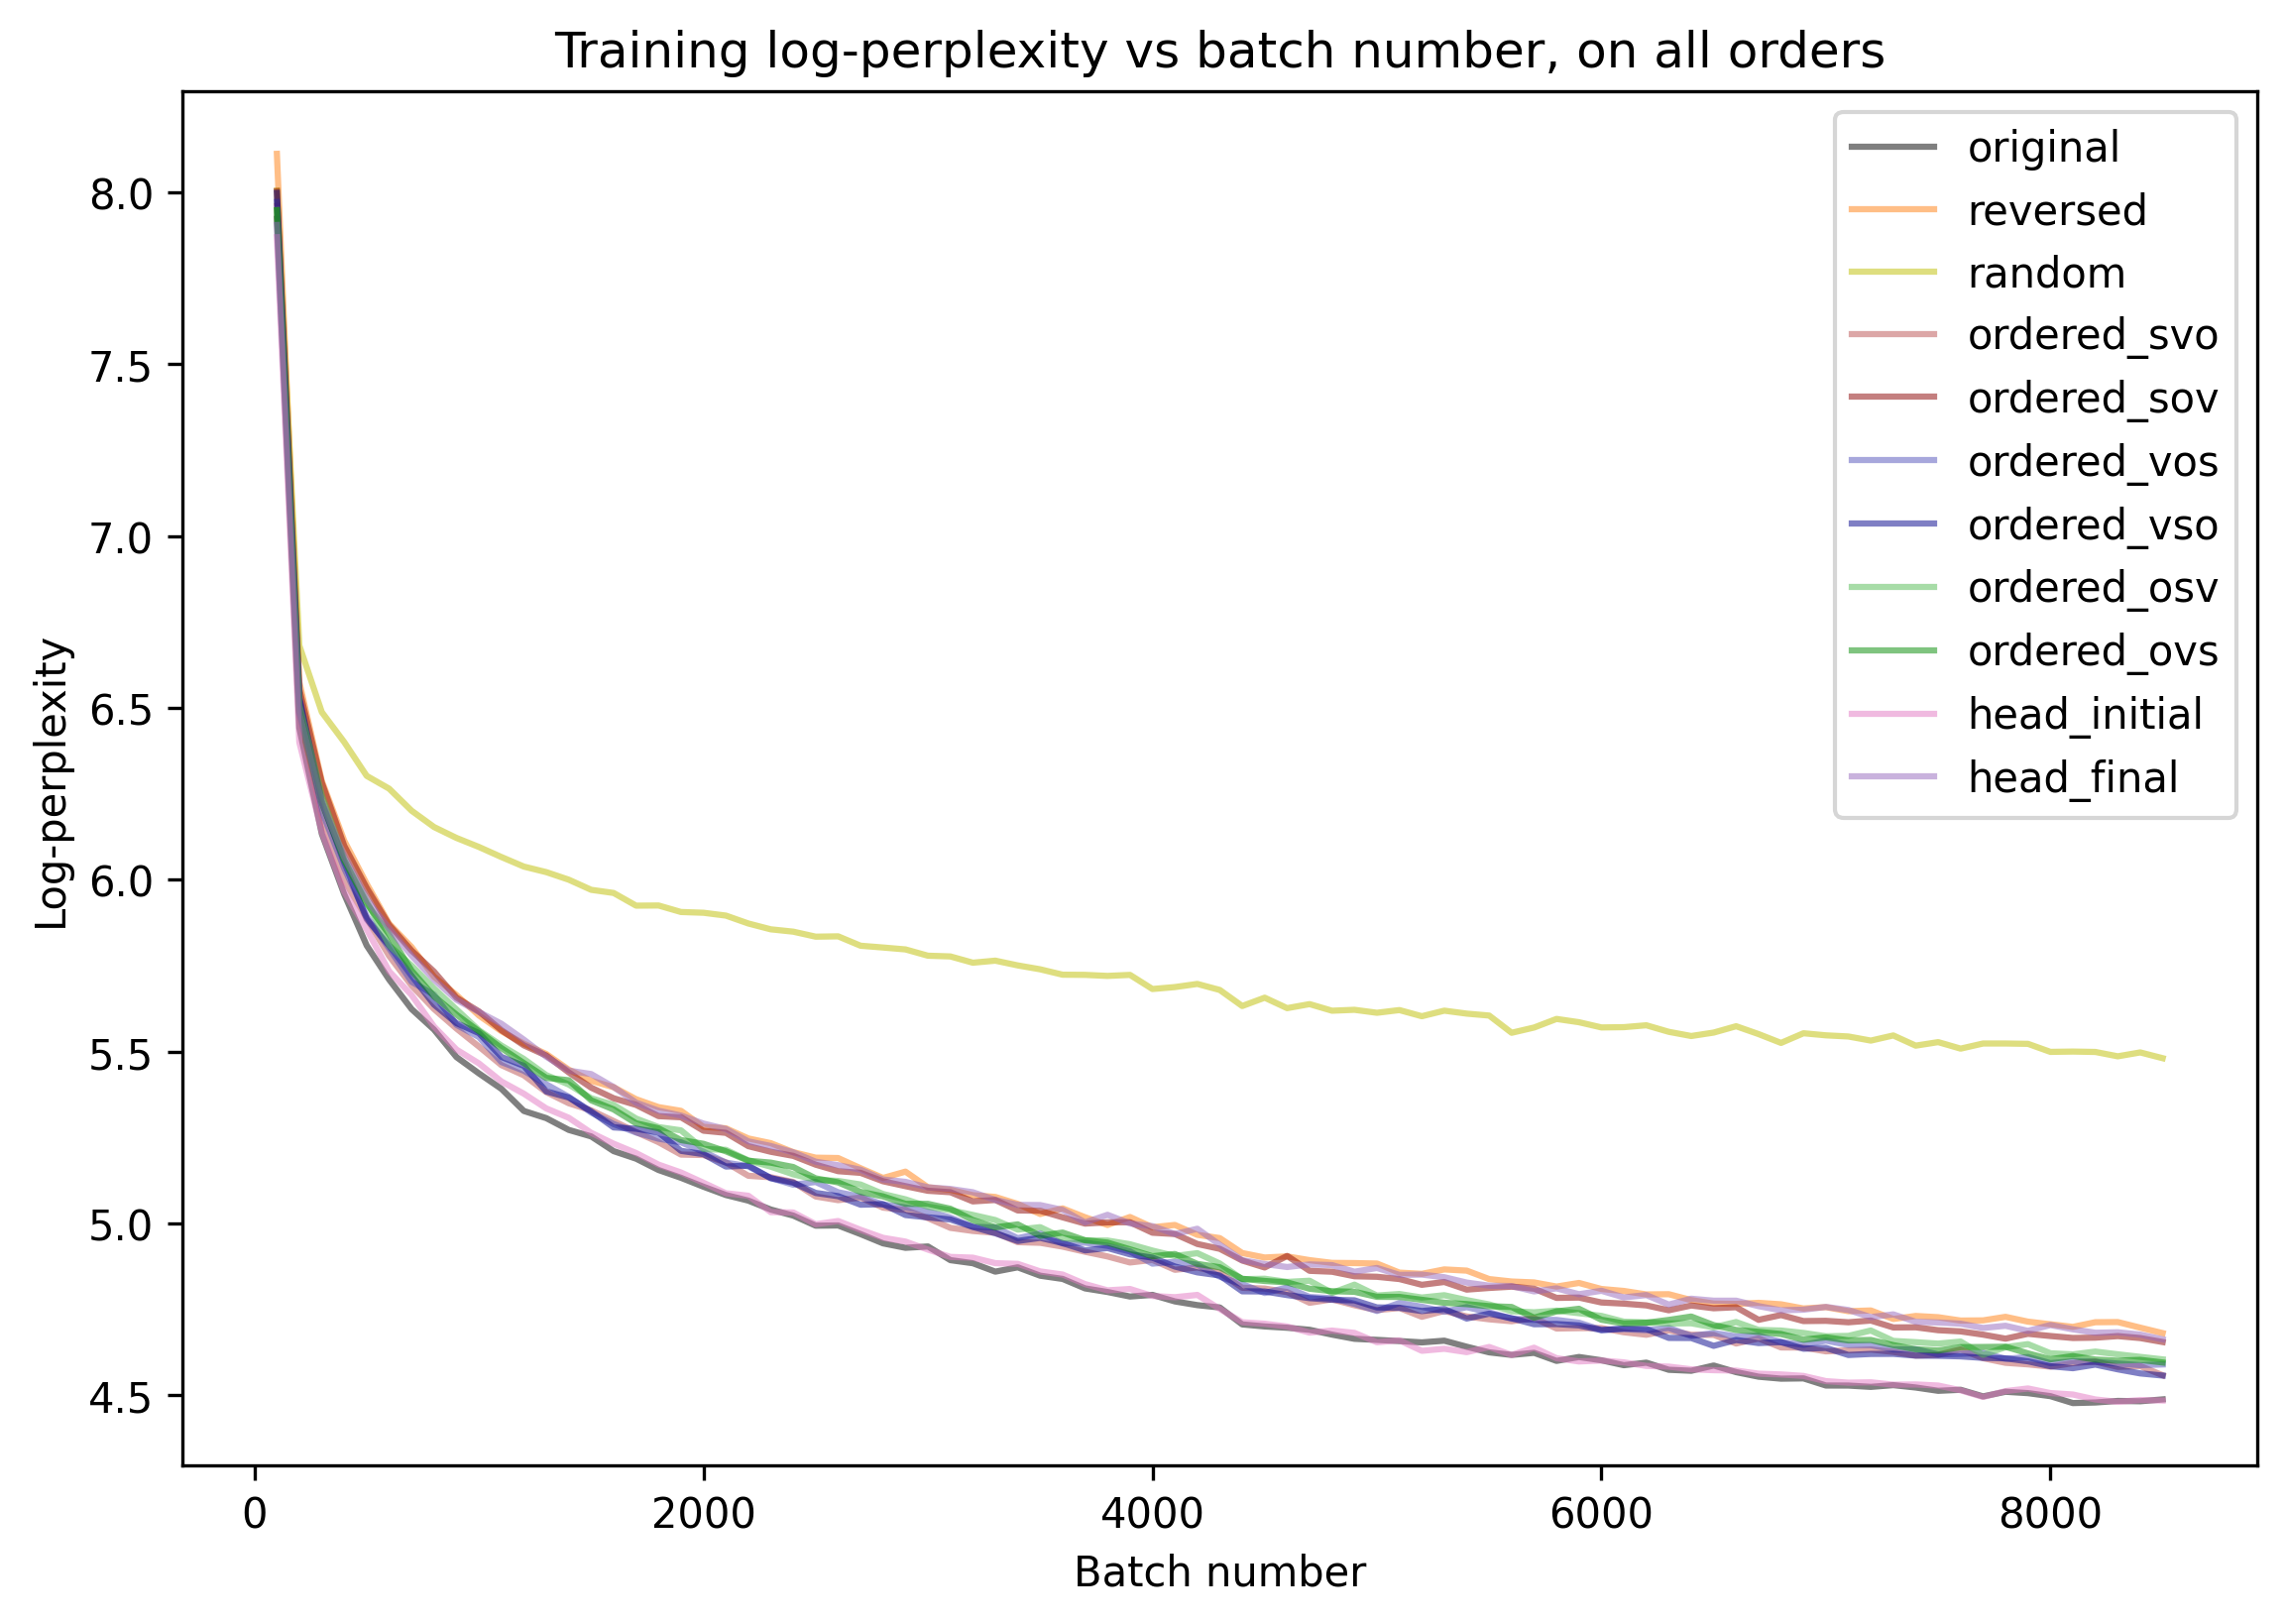

In [ ]:
# plot rolling mean perplexity over num batches for all different orders on same graph

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=300)

for order, style in zip(possible_orders, colors):
    file_name = f'{NLP_folder}/trained_model_{order}_{n_datapoints}_{n_epochs}/{dataset_name}_losses'
    loss_data = data_processing_utils.load_from_json_file(file_name)
    if order in ['final', 'initial']:
      order = "head_" + order
    pd.Series(loss_data).rolling(100, step=100).mean().plot(title=f'Training log-perplexity vs batch number, on all orders', xlabel='Batch number', ylabel='Log-perplexity', label=order, alpha = 0.5, style=style)
plt.legend()
plt.show()


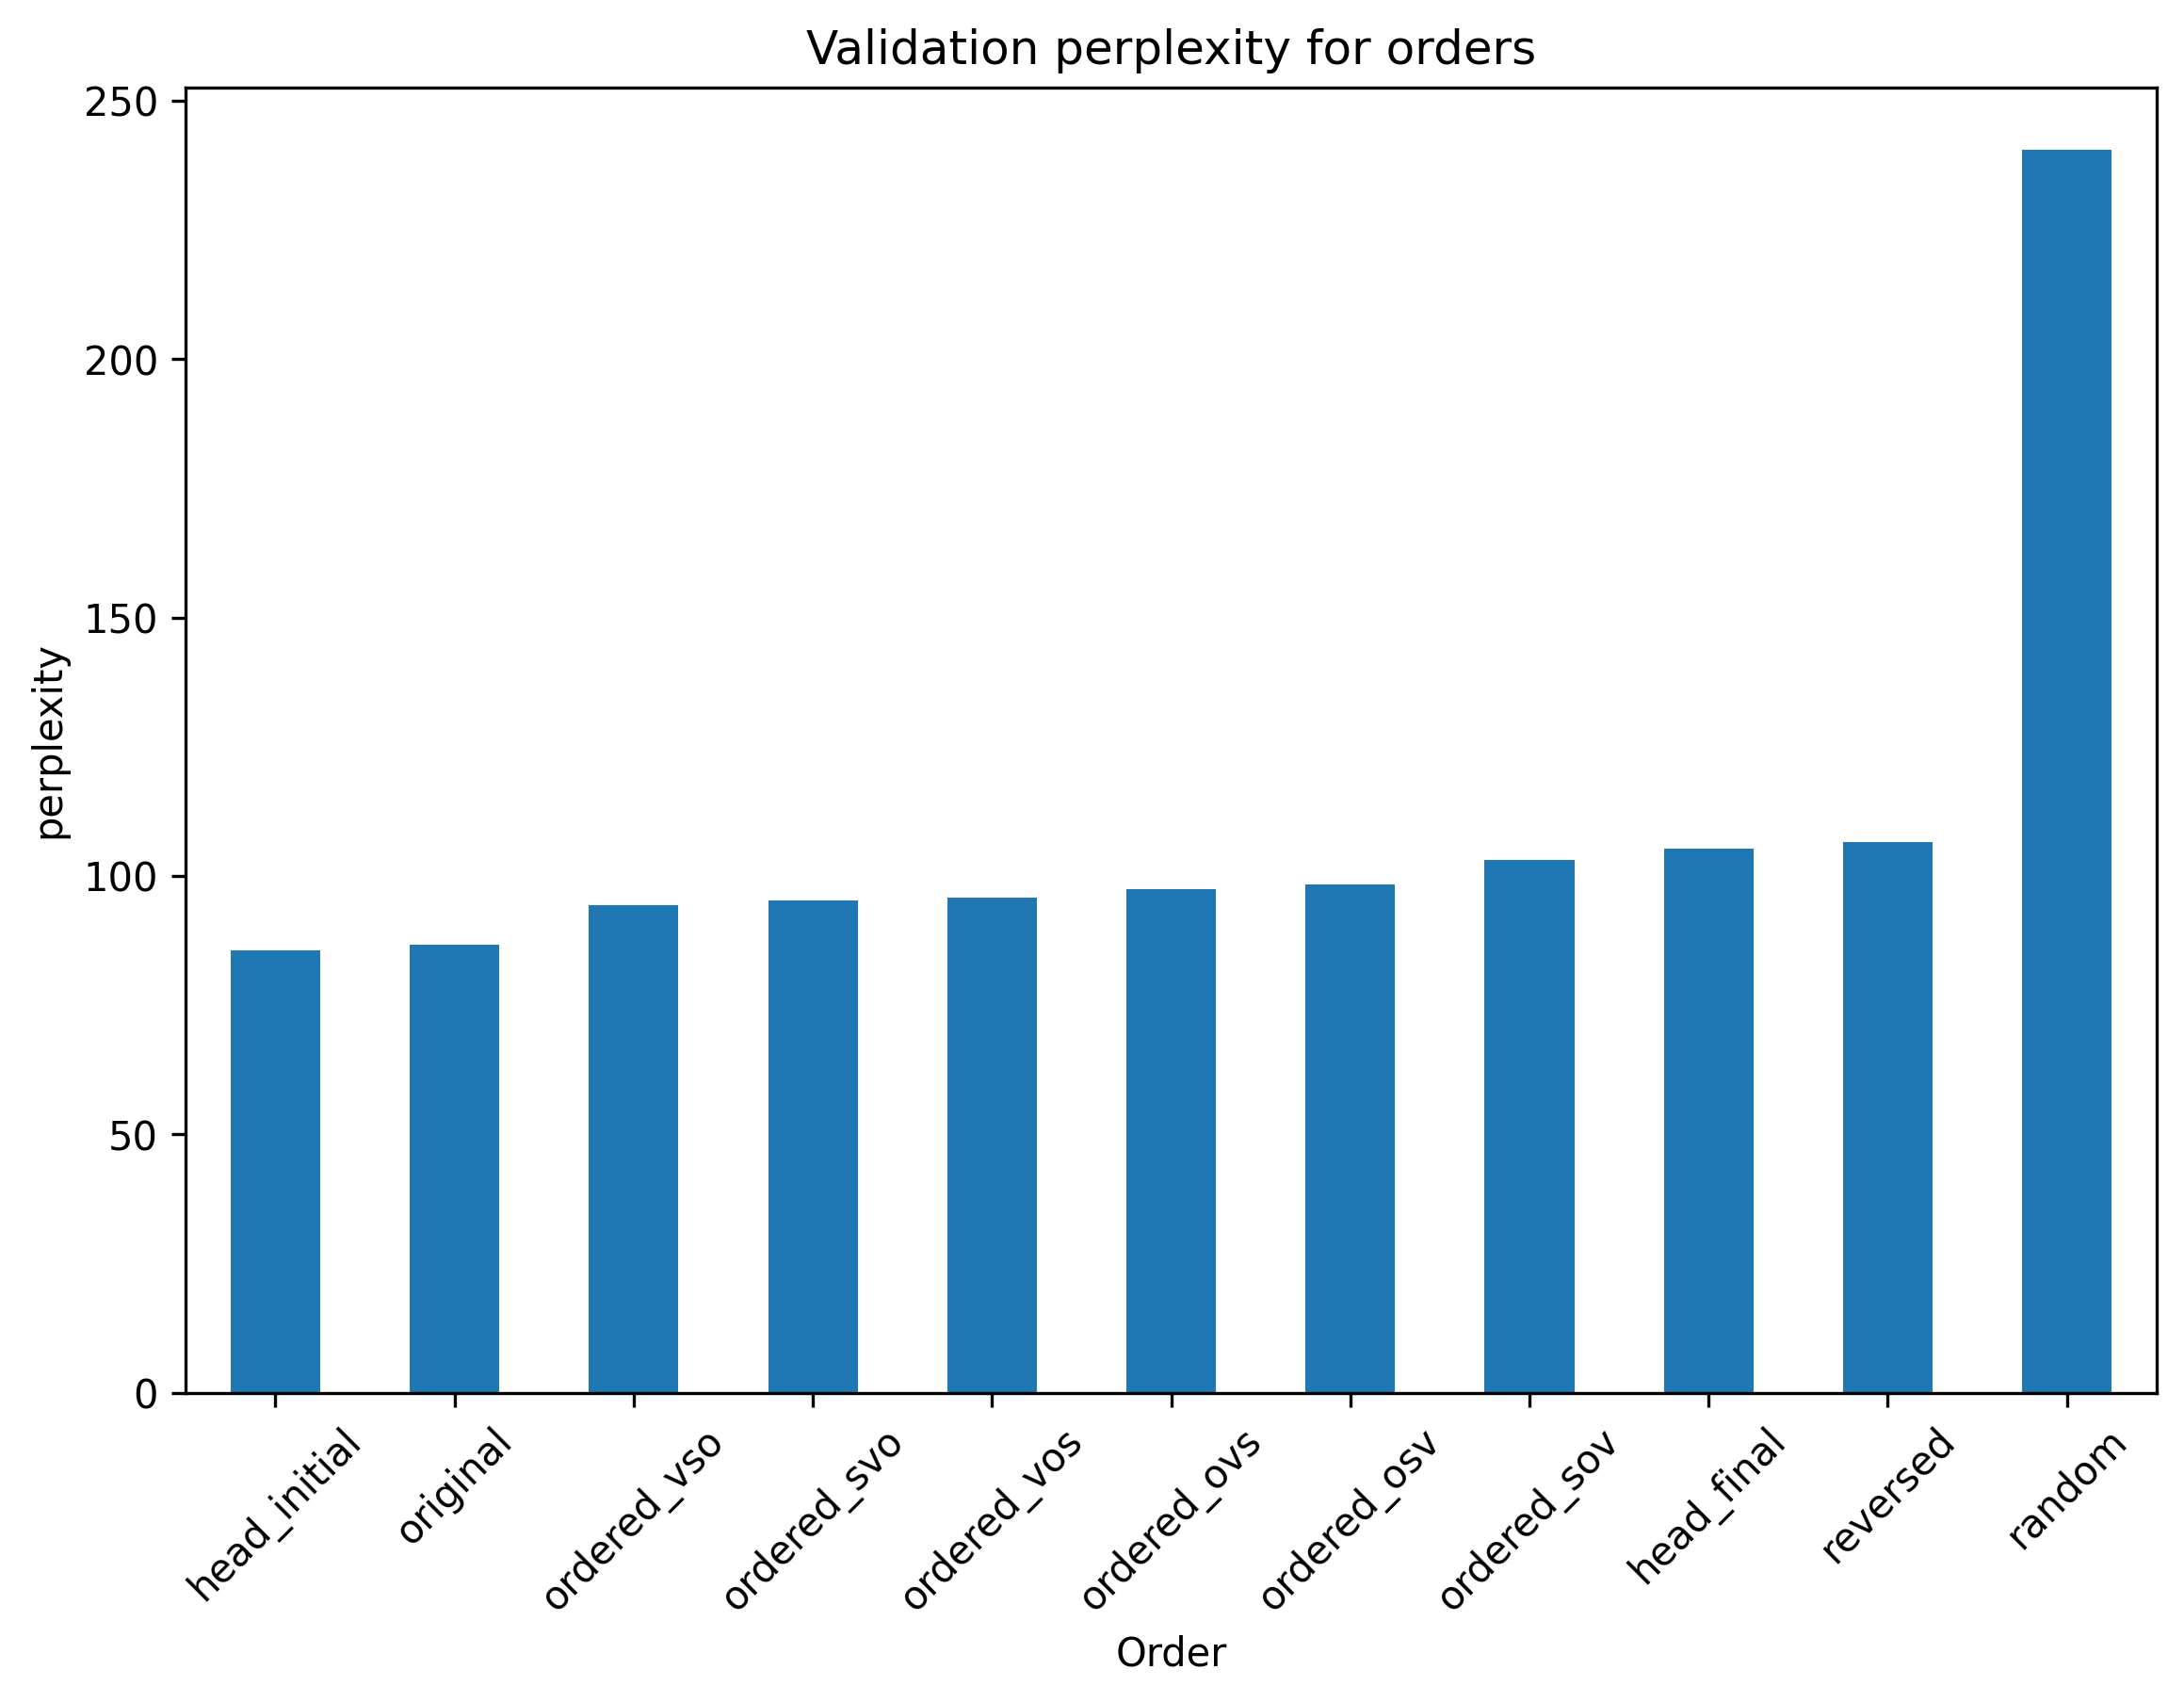

In [36]:
#plot bar graph of mean perplexities for all orders on training data

plt.figure(figsize=(9, 6), dpi=300)

mean_perplexities = {}
for order in possible_orders:
  if order not in ['ordered_vso', 'final', 'initial']:
    file_name = f'{NLP_folder}/trained_model_{order}_{n_datapoints}_{n_epochs}/validation_losses'
    loss_data = data_processing_utils.load_from_json_file(file_name)
    mean_loss = np.exp(loss_data).mean()
    mean_perplexities[order] = mean_loss

mean_perplexities['ordered_vso'] = 94.4036871
mean_perplexities['head_initial'] = 85.5322777
mean_perplexities['head_final'] = 105.215618
pd.Series(mean_perplexities).sort_values(ascending=True).plot(kind='bar', title=f'Validation perplexity for orders', xlabel='Order', ylabel='perplexity', style=['k', 'tab:orange', 'y', 'r', '#8b0000', 'b', '#00008b', 'g', '#008b00', 'tab:pink', 'tab:purple'])

plt.xticks(rotation=45)

plt.show()

In [38]:
print(pd.Series(mean_perplexities).sort_values(ascending=True))

head_initial     85.532278
original         86.696847
ordered_vso      94.403687
ordered_svo      95.322290
ordered_vos      95.900376
ordered_ovs      97.417854
ordered_osv      98.443709
ordered_sov     103.072923
head_final      105.215618
reversed        106.654810
random          240.601836
dtype: float64


In [ ]:
colors_list = []
for order, color in zip(possible_orders,colors):
  if order in ['final', 'initial']:
    order = "head_" + order
  if order == 'random': continue
  colors_list.append((mean_perplexities[order], color))

colors_list.sort(key=lambda x: x[0])
print([color for _, color in colors_list])

['tab:pink', 'k', '#00008b', '#bb5050', '#5050bb', '#008b00', '#50bb50', '#8b0000', 'tab:purple', 'tab:orange']


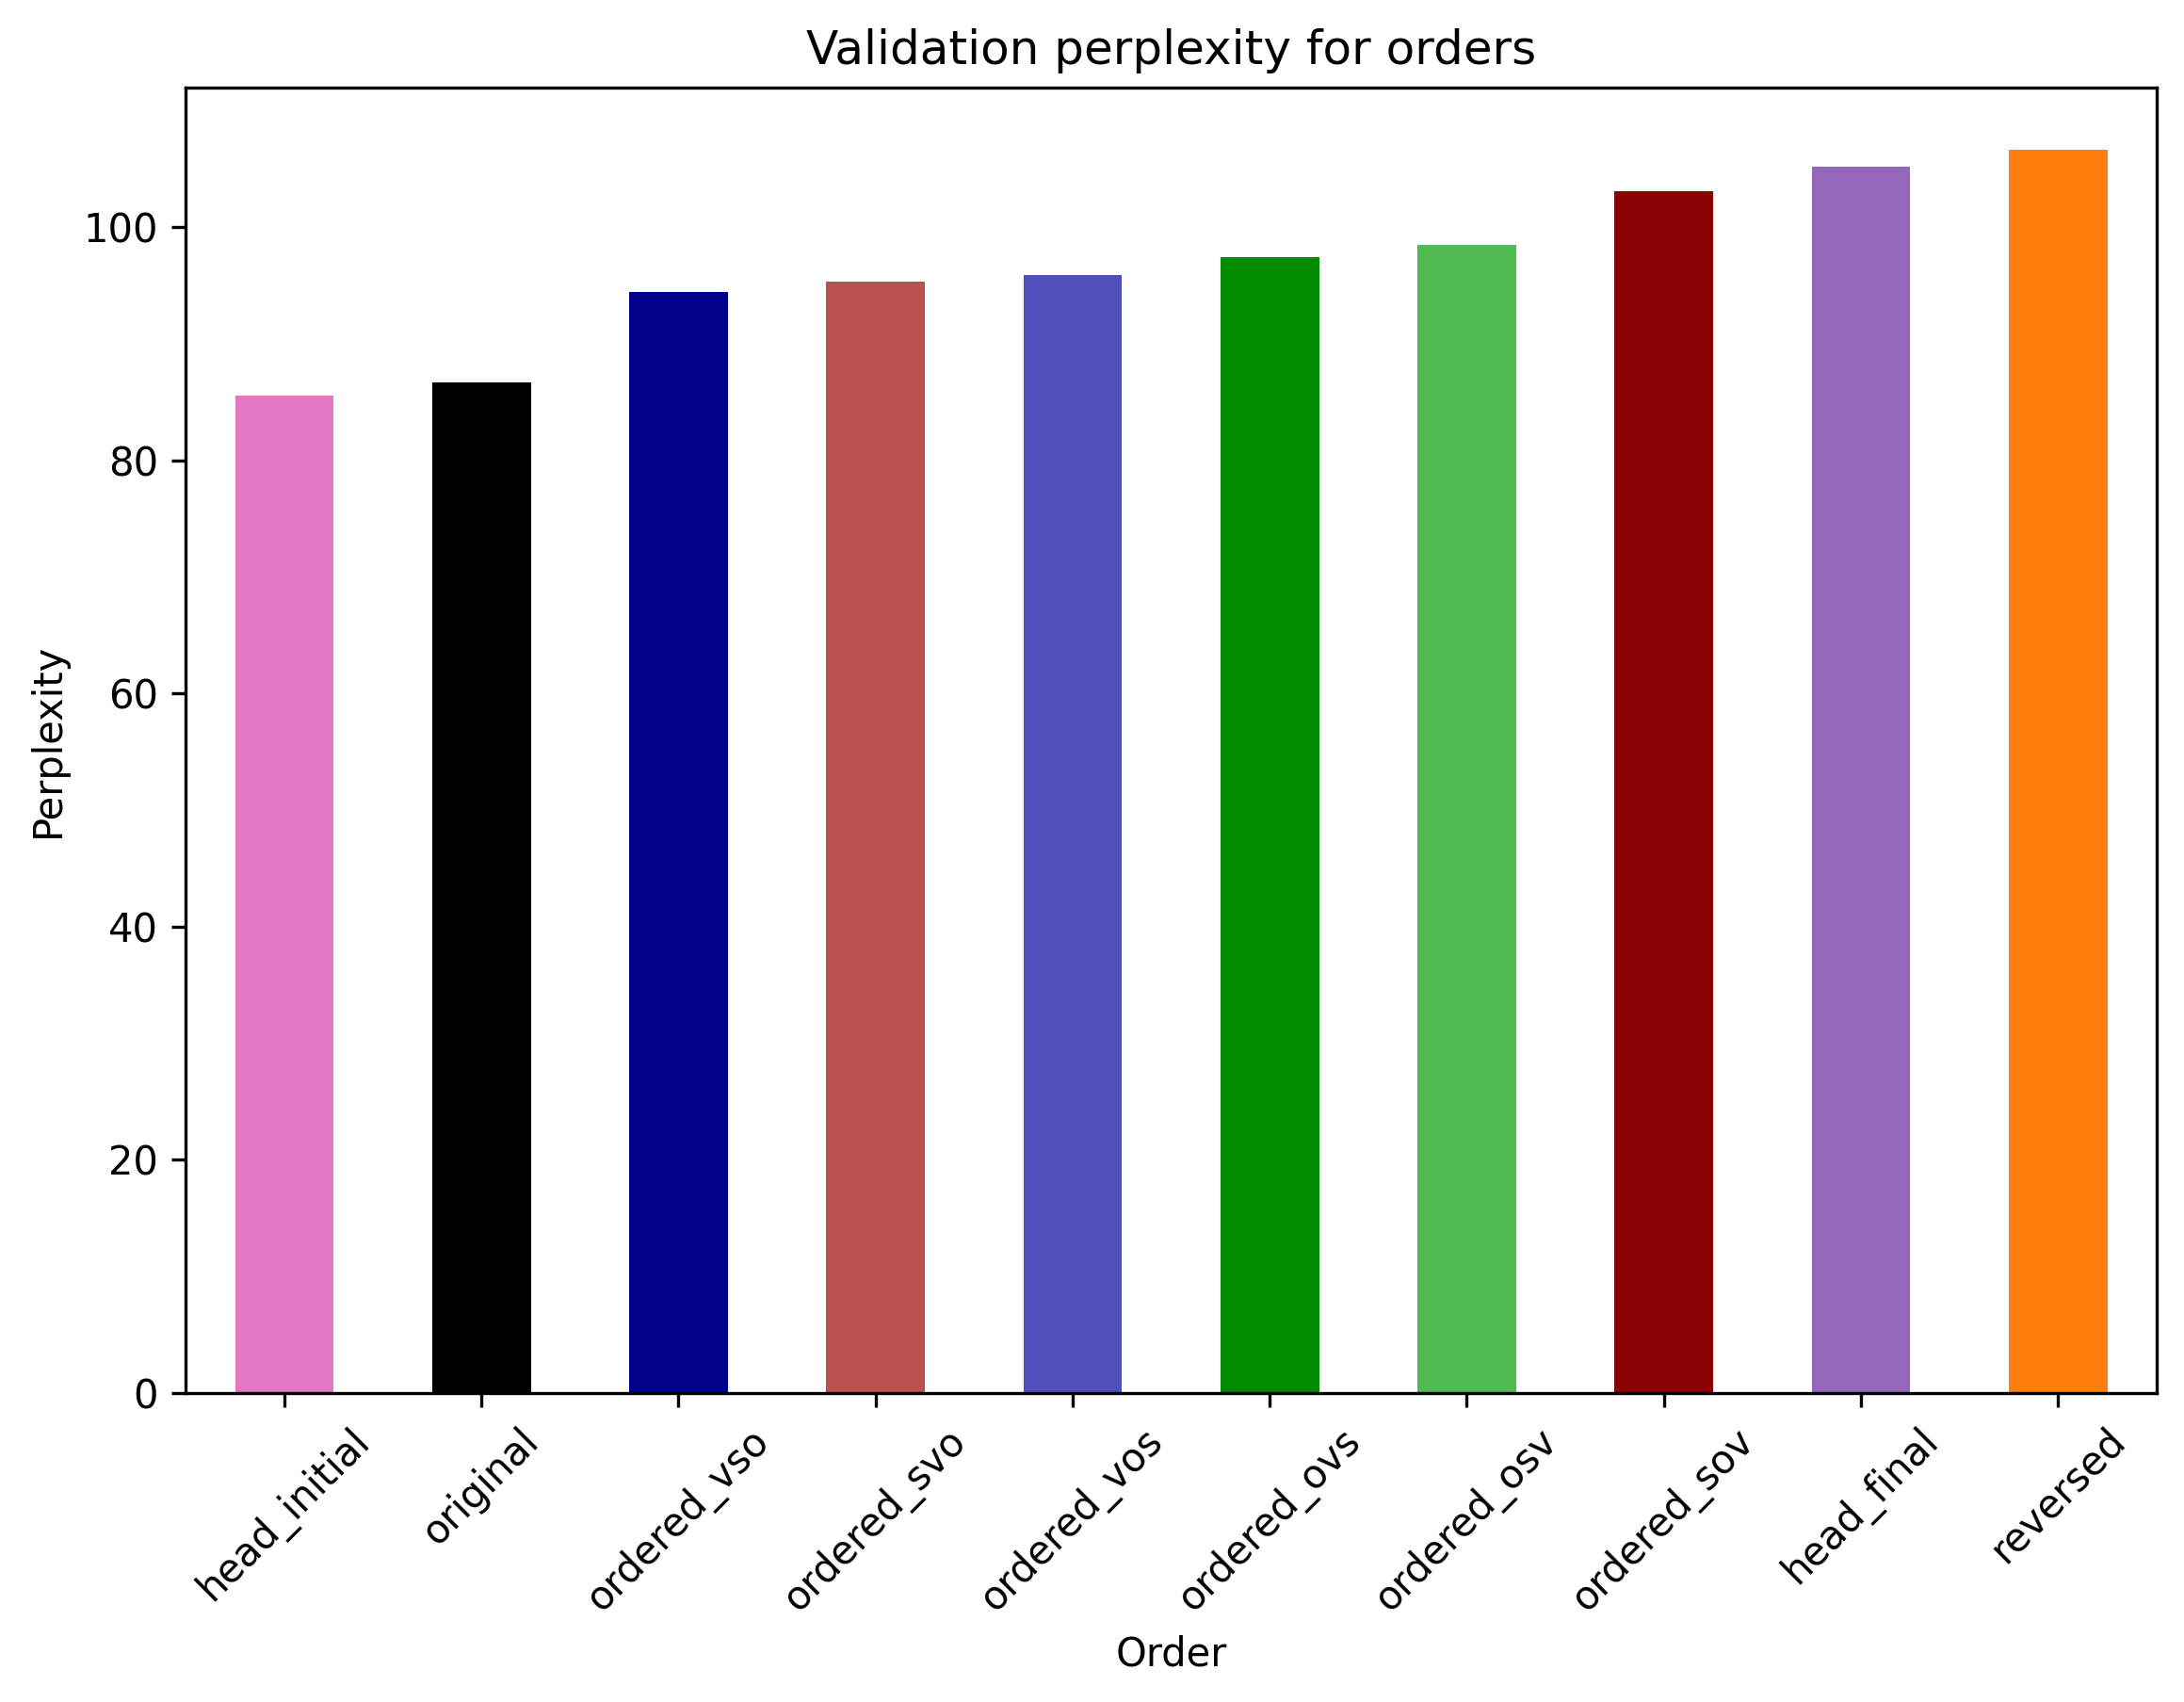

In [ ]:
if 'random' in mean_perplexities:
  del mean_perplexities['random']

plt.figure(figsize=(9, 6), dpi=300)

pd.Series(mean_perplexities).sort_values(ascending=True).plot(kind='bar', title=f'Validation perplexity for orders', xlabel='Order', ylabel='Perplexity', color=[color for _, color in colors_list])

plt.xticks(rotation=45)

plt.show()